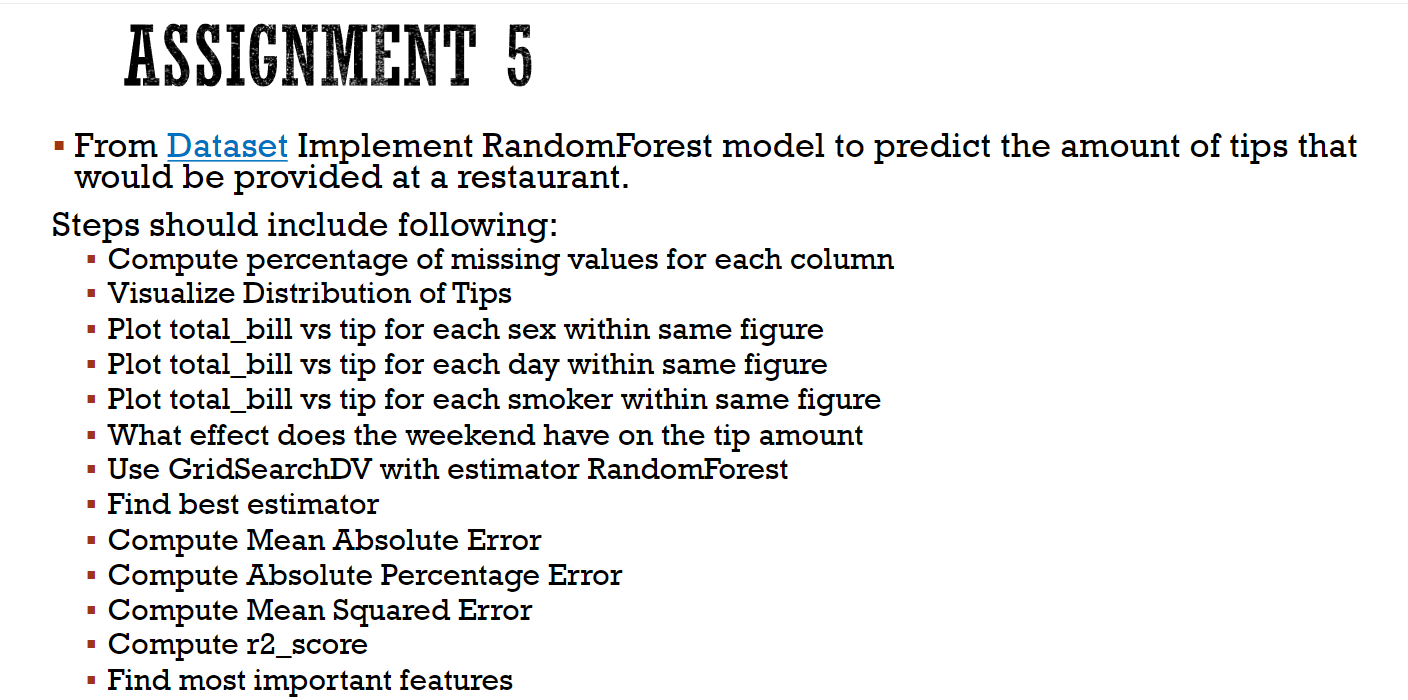

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('AML_Ensembles.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


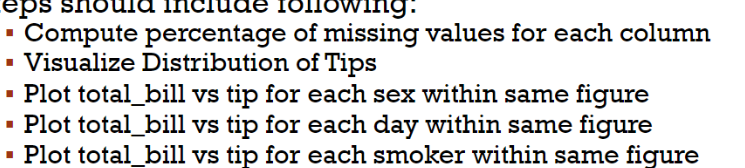

In [3]:
df.isnull().sum() * 100 / len(df)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

Every column has zero percent 

<AxesSubplot:xlabel='tip', ylabel='Count'>

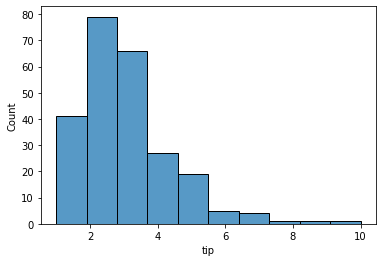

In [4]:
import seaborn as sns
sns.histplot(df['tip'], bins=10)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

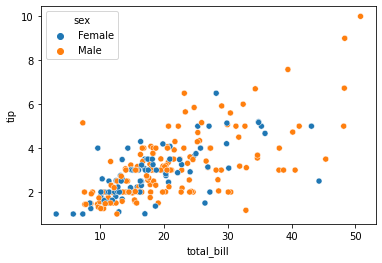

In [5]:
sns.scatterplot(y='tip', x='total_bill', data=df, hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

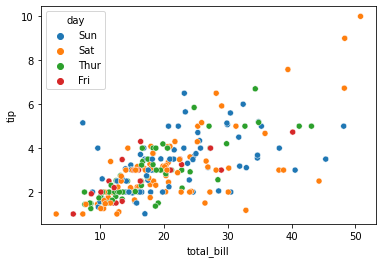

In [6]:
sns.scatterplot(y='tip', x='total_bill', data=df, hue='day')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

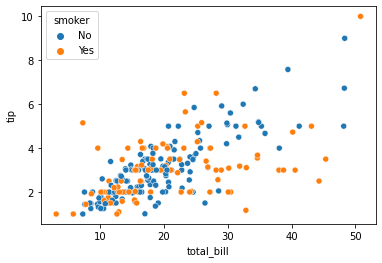

In [7]:
sns.scatterplot(y='tip', x='total_bill', data=df, hue='smoker')

In [8]:
df.groupby('day')['tip'].sum().sort_values(ascending=False)

day
Sat     260.40
Sun     247.39
Thur    171.83
Fri      51.96
Name: tip, dtype: float64

In [9]:
categ = df.select_dtypes(exclude=[np.number])
categ

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


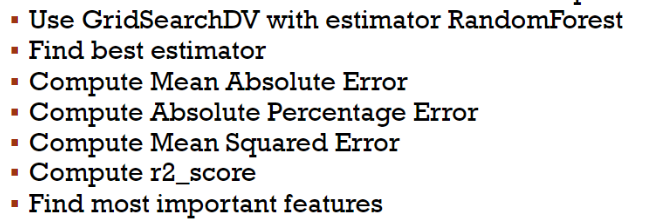

In [10]:
from sklearn import preprocessing
df[categ.columns] = df[categ.columns].apply(preprocessing.LabelEncoder().fit_transform)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X = df[['total_bill', 'tip', 'sex', 'day', 'time', 'size']]
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
randomforest = RandomForestRegressor().fit(X_train, y_train)

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
n_features = [i for i in range(100, 1000, 50)]

In [15]:
max_depth = [i for i in range(1, 20, 5)]

In [16]:
max_leaf_nodes = [i for i in range(2, 10, 2)]

In [17]:
min_samples_split = [i for i in range(2, 10, 2)]

In [18]:
param_grid = {"n_estimators": n_features, "max_depth": max_depth, "max_leaf_nodes": max_leaf_nodes, "min_samples_split": min_samples_split}

In [19]:
g_search = GridSearchCV(estimator = randomforest, param_grid = param_grid, n_jobs=-1, cv=5)

In [ ]:
g_search.fit(X_train, y_train)

In [ ]:
g_search.best_params_

In [ ]:
randomforest1 = RandomForestRegressor(max_depth=16, max_leaf_nodes = 4, min_samples_split= 4, n_estimators=100).fit(X_train, y_train)

In [ ]:
predictions = randomforest1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
error = mean_absolute_percentage_error(y_test, predictions)
error

In [ ]:
from sklearn.metrics import mean_squared_error
mean = mean_squared_error(y_test, predictions)
mean

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test, predictions)
r

In [ ]:
import matplotlib.pyplot as plt
plt.barh(range(6), randomforest1.feature_importances_)